# **Лабораторная работа № 1.**
### по курсу «Нейроинформатика»
## **Тема: Персептроны. Процедура обучения Розенблатта**



> Студент: Овечкин В.А.

> Группа: М8О-408Б-18

> Преподаватель: Аносова Н.П.

> Оценка:









## **Цель работы**: 
Исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.

## **Постановка задачи:**

1.   Для первой обучающей выборки построить и обучить сеть, которая будет правильно относить точки к двум классам. Отобразить дискриминантную линию и проверить качество обучения.
2.   Изменить обучающее множество так, чтобы классы стали линейно
неразделимыми. Проверить возможности обучения по правилу Розенблатта.
3.   Для второй обучающей выборки построить и обучить сеть, которая будет правильно относить точки к четырем классам. Отобразить дискриминантную линию и проверить
качество обучения.







## **Вариант** :
image.png
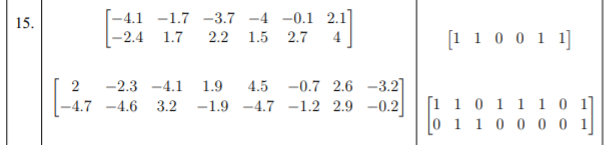

# Листинг кода

In [ ]:
#Стандартная библиотека Python
import numpy as np

#вспомогательные функции sklearn для создания объектов производных классов
#from sklearn.base import BaseEstimator, ClassifierMixin

# переопределим функцию Хевисайда
H = lambda x: np.heaviside(x, 1).astype(np.int)

# для построения графиков
import matplotlib.pyplot as plt

Однослойный персептрон Розенблатта

In [ ]:
class Rosenblatt():
    """
    Implementation of Rosenblatt's Perceptron using sklearn BaseEstimator and
    ClassifierMixin.
    """

    def __init__(self):
        return

    def predict(self, X):
        return H( X.dot(self.weights) + self.bias )

    def fit(self, X, y, epochs=100):
        
        """
        Implementation of the Perceptron Learning Algorithm.
        
        INPUT
        -----
        
        X : numpy 2D array. Each row corresponds to one training example.
        
        y : numpy 1D array. Label (0 or 1) of each example.
        
        OUTPUT
        ------
        
        self : The trained perceptron model.
        """

        # --> Number of features.
        n = X.shape[1]

        # --> Initialize the weights and bias.
        self.weights = np.zeros((n, ))
        self.bias = 0.0

        # --> Perceptron algorithm loop.
        for _ in range(epochs):

            # --> Current number of errors.
            errors = 0

            # --> Loop through the examples.
            for xi, y_true in zip(X, y):

                # --> Compute error.
                error = y_true - self.predict(xi)

                if error != 0:
                    # --> Update the weights and bias.
                    self.weights += error * xi
                    self.bias += error

                    # --> Current number of errors.
                    errors += 1

            # --> If no error is made, exit the outer for loop.
            if errors == 0:
                break

        return (self.bias), (self.weights)

In [ ]:
#массив Х
data = np.array([(-4.1,-2.4),
                 (-1.7,1.7),
                 (-3.7,2.2),
                 (-4,1.5),
                 (-0.1,2.7),
                 (2.1,4)])

#массив У
labels =np.array([1,1,0,0,1,1])

In [ ]:
sample1 = Rosenblatt()
sample1.fit(data, labels)
print(sample1.fit(data, labels))
a,(b,c) = sample1.fit(data, labels)

(6.0, array([ 2. , -1.4]))


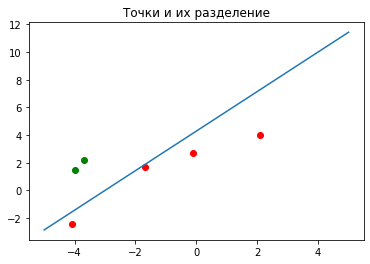

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()

#  Данные, которые хотим отобразить:
for i in range(len(data)):
  if labels[i] == 1:
    ax.scatter(data[i][0], data[i][1], color='red')
  else:
    ax.scatter(data[i][0], data[i][1], color='green')

fig = plt.figure()

x = np.linspace(-5, 5)

func = a/(-c) + b/(-c)*x # тк w1*x1+w2*x2 +w0 = 0, то получим х2= -w1*x1/w2 -w0/w2
ax.plot(x,func)

ax.set(title='Точки и их разделение')    #  метод, размещающий заголовок
                                       #  над "Axes"


    
plt.show()

Теперь изменим обучающее множество так, чтобы классы стали линейно неразделимыми и проверим возможность обучения по правилу Розенблатта.

In [ ]:
#массив Х
datach = np.array([(-1,-1),
                 (-1,1),
                 (1,-1),
                 (1,1),
                 (0,1),
                 (1,0),
                 (0,-1),
                 (-1,0),
                 (0,0)])

#массив У
labelsch =np.array([1,1,1,1,1,1,1,1,0])

In [ ]:
sample2 = Rosenblatt()
sample2.fit(datach, labelsch)
print(sample2.fit(datach, labelsch))
a,(b,c) = sample2.fit(datach, labelsch)

(0.0, array([0., 0.]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


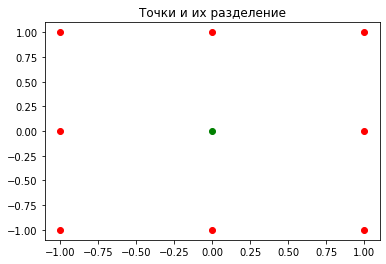

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()

#  Данные, которые хотим отобразить:
for i in range(len(datach)):
  if labelsch[i] == 1:
    ax.scatter(datach[i][0], datach[i][1], color='red')
  else:
    ax.scatter(datach[i][0], datach[i][1], color='green')

fig = plt.figure()

x = np.linspace(-5, 5)

func = a/(-c) + b/(-c)*x # тк w1*x1+w2*x2 +w0 = 0, то получим х2= -w1*x1/w2 -w0/w2
ax.plot(x,func)

ax.set(title='Точки и их разделение')    #  метод, размещающий заголовок
                                       #  над "Axes"


    
plt.show()